In [1]:
%pip install pandas matplotlib scikit-learn
%pip install keras



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install pillow


Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import Xception
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from keras.preprocessing import image 
from keras.models import Sequential
from sklearn import metrics

In [4]:
import tensorflow as tf

# List physical devices to check for GPU
physical_devices = tf.config.list_physical_devices('GPU')
print("Physical GPUs found:", physical_devices)


Physical GPUs found: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
# Check if TensorFlow is using the GPU
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print("Built with GPU support:", tf.test.is_built_with_gpu_support())
print("Is the GPU being used?:", tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None))


Num GPUs Available: 1
Built with GPU support: False
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is the GPU being used?: True


2024-11-05 13:52:18.624843: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-11-05 13:52:18.624870: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-11-05 13:52:18.624877: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-11-05 13:52:18.624895: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-05 13:52:18.624908: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
train_defective = '/Users/anandlo/Downloads/Quality Assurance using Computer Vision and Deep Learning/data/train/defective/'
train_non_defective = '/Users/anandlo/Downloads/Quality Assurance using Computer Vision and Deep Learning/data/train/non-defective/'

test_defective = '/Users/anandlo/Downloads/Quality Assurance using Computer Vision and Deep Learning/data/test/defective/'
test_non_defective = '/Users/anandlo/Downloads/Quality Assurance using Computer Vision and Deep Learning/data/test/non-defective/'

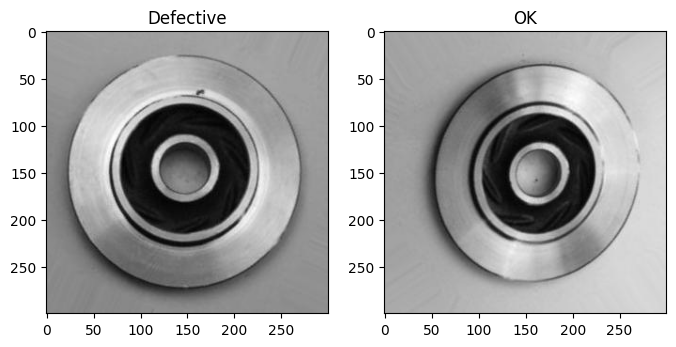

In [7]:
# Ploting images

fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].imshow(plt.imread(train_defective+os.listdir(train_defective)[0]))
axes[1].imshow(plt.imread(train_non_defective+os.listdir(train_non_defective)[0]))
axes[0].set_title('Defective')
axes[1].set_title('OK')
plt.show()

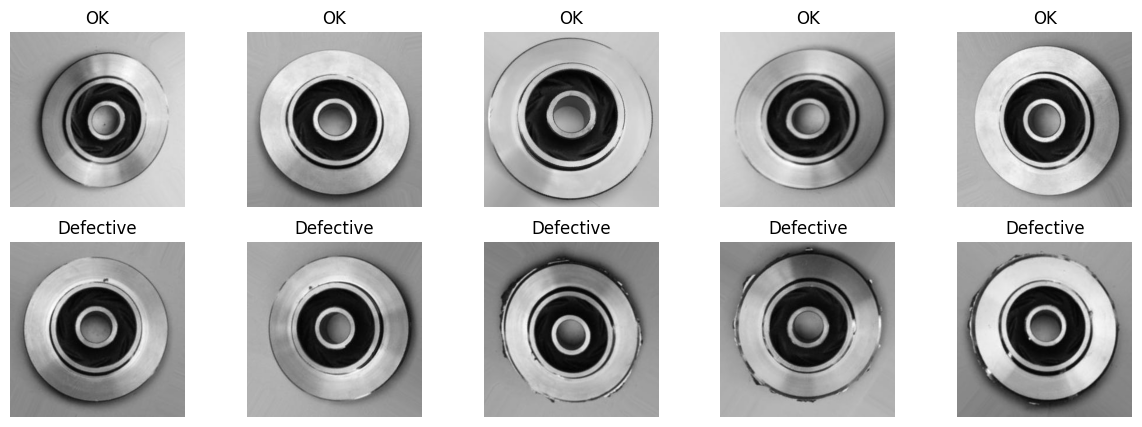

In [8]:
num_images = 5

# create a figure with two rows and num_images columns
fig, axs = plt.subplots(nrows=2, ncols=num_images, figsize=(15,5))

# plot the ok images
for i, filename in enumerate(os.listdir(train_non_defective)[:num_images]):
    img = plt.imread(train_non_defective + filename)
    axs[0,i].imshow(img)
    axs[0,i].set_title('OK')
    axs[0,i].axis('off')

# plot the defective images
for i, filename in enumerate(os.listdir(train_defective)[:num_images]):
    img = plt.imread(train_defective + filename)
    axs[1,i].imshow(img)
    axs[1,i].set_title('Defective')
    axs[1,i].axis('off')

# adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.1, hspace=0.2)

# show the plot
plt.show()

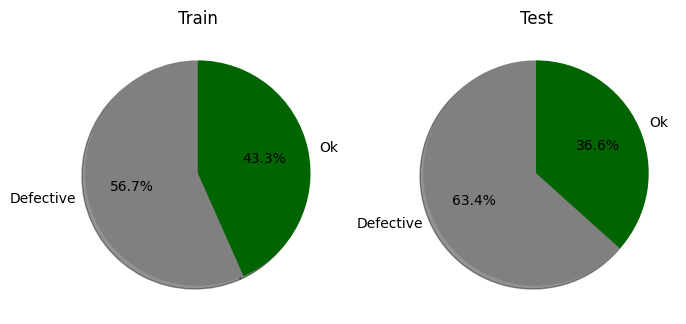

 Defective Training Images 	: 3758
 Ok Training Images 		: 2875

 Defective Testing Images 	: 453
 Ok Testing Images 		: 262


In [9]:
x_train = np.array([len(os.listdir(train_defective)),len(os.listdir(train_non_defective))])
x_test = np.array([len(os.listdir(test_defective)),len(os.listdir(test_non_defective))])
label = ['Defective','Ok']
colors = ['grey', 'darkgreen']
  
fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].pie(x_train, labels=label, autopct='%1.1f%%',shadow=True, startangle=90, colors=colors)
axes[1].pie(x_test, labels=label, autopct='%1.1f%%',shadow=True, startangle=90, colors=colors)
axes[0].set_title('Train')
axes[1].set_title('Test')
plt.show()

print(' Defective Training Images \t: ' + str(len(os.listdir(train_defective))))
print(' Ok Training Images \t\t: ' + str(len(os.listdir(train_non_defective))))
print()
print(' Defective Testing Images \t: ' + str(len(os.listdir(test_defective))))
print(' Ok Testing Images \t\t: ' + str(len(os.listdir(test_non_defective))))

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import Xception


# Define the input shape of the images
input_shape = (300, 300, 3)

# Define the data generators for the training and validation sets
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/Users/anandlo/Downloads/Quality Assurance using Computer Vision and Deep Learning/data/train',
    target_size=input_shape[:2],
    batch_size=64,
    class_mode='categorical',
    subset='training')

valid_generator = train_datagen.flow_from_directory(
    '/Users/anandlo/Downloads/Quality Assurance using Computer Vision and Deep Learning/data/train',
    target_size=input_shape[:2],
    batch_size=64,
    class_mode='categorical',
    subset='validation')

test_generator = test_datagen.flow_from_directory(
    '/Users/anandlo/Downloads/Quality Assurance using Computer Vision and Deep Learning/data/test',
    target_size=input_shape[:2],
    batch_size=64,
    class_mode='categorical')


Found 4644 images belonging to 2 classes.
Found 1989 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [11]:
# Load the pre-trained MobileNetV1 model without the top layer
base_model = Xception(include_top=False, weights='imagenet', input_shape=input_shape)

# Freeze all the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add a global average pooling layer and a dense output layer for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

# Define the model with the base model and the new layers
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with the Adam optimizer and categorical cross-entropy loss
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

2024-11-05 13:52:19.290217: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-05 13:52:19.290239: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 300, 300,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 149, 149,  │        864 │ input_layer[0][0] │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 149, 149,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 149, 149,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 147, 147,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 147, 147,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 147, 147,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 147, 147,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 147, 147,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 147, 147,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 147, 147,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 147, 147,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 74, 74,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 74, 74,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 74, 74,    │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 74, 74,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 74, 74,    │          0 │ add[0][0]       

 Total params: 21,386,538 (81.58 MB)

 Trainable params: 525,058 (2.00 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

Epoch 1/20


2024-11-05 13:52:21.088296: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


20/20 ━━━━━━━━━━━━━━━━━━━━ 79s 4s/step - accuracy: 0.6594 - loss: 0.6322 - val_accuracy: 0.8658 - val_loss: 0.4851
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 73s 4s/step - accuracy: 0.8856 - loss: 0.4550 - val_accuracy: 0.8783 - val_loss: 0.3952
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 73s 4s/step - accuracy: 0.9058 - loss: 0.3676 - val_accuracy: 0.9271 - val_loss: 0.3205
Epoch 4/20
13/20 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9296 - loss: 0.3158

2024-11-05 13:56:24.518681: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-05 13:56:24.518710: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 235239849046979804
2024-11-05 13:56:24.518714: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14630172537447081656
2024-11-05 13:56:24.518718: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1842744331795720219
2024-11-05 13:56:24.518722: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 5819775595031438383
2024-11-05 13:56:24.518725: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3805056043444485697
2024-11-05 13:56:24.518733: W tensorflow/core/framework/local_rendezvou

20/20 ━━━━━━━━━━━━━━━━━━━━ 66s 3s/step - accuracy: 0.9353 - loss: 0.3137 - val_accuracy: 0.9387 - val_loss: 0.2888
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 78s 4s/step - accuracy: 0.9593 - loss: 0.2754 - val_accuracy: 0.9432 - val_loss: 0.2519
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 76s 4s/step - accuracy: 0.9598 - loss: 0.2329 - val_accuracy: 0.9593 - val_loss: 0.2149
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 73s 4s/step - accuracy: 0.9747 - loss: 0.1864 - val_accuracy: 0.9618 - val_loss: 0.2073
Epoch 8/20
13/20 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9686 - loss: 0.2017

2024-11-05 14:01:16.206813: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-05 14:01:16.206852: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/Shape/_26]]
2024-11-05 14:01:16.206864: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1842744331795720219
2024-11-05 14:01:16.206868: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 5819775595031438383
2024-11-05 14:01:16.206870: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 235239849046979804
2024-11-05 14:01:16.206876: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14630172537447081

20/20 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step - accuracy: 0.9682 - loss: 0.1983 - val_accuracy: 0.9688 - val_loss: 0.1775
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 72s 4s/step - accuracy: 0.9781 - loss: 0.1650 - val_accuracy: 0.9713 - val_loss: 0.1602
Epoch 10/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 73s 4s/step - accuracy: 0.9780 - loss: 0.1456 - val_accuracy: 0.9749 - val_loss: 0.1459
Epoch 11/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 73s 4s/step - accuracy: 0.9834 - loss: 0.1350 - val_accuracy: 0.9759 - val_loss: 0.1335
Epoch 12/20
13/20 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9757 - loss: 0.1438

2024-11-05 14:05:57.271260: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-05 14:05:57.271276: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/Add_6/_22]]
2024-11-05 14:05:57.271283: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15255441251871002775
2024-11-05 14:05:57.271286: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 5043264208165556845
2024-11-05 14:05:57.271290: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 5819775595031438383
2024-11-05 14:05:57.271294: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 2134963778

20/20 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step - accuracy: 0.9754 - loss: 0.1425 - val_accuracy: 0.9789 - val_loss: 0.1289
Epoch 13/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 72s 4s/step - accuracy: 0.9802 - loss: 0.1185 - val_accuracy: 0.9784 - val_loss: 0.1169
Epoch 14/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 73s 4s/step - accuracy: 0.9842 - loss: 0.1104 - val_accuracy: 0.9834 - val_loss: 0.1090
Epoch 15/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 276s 14s/step - accuracy: 0.9819 - loss: 0.1034 - val_accuracy: 0.9854 - val_loss: 0.1037
Epoch 16/20
13/20 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9937 - loss: 0.0896

2024-11-05 14:14:00.980222: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-05 14:14:00.980250: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/Shape/_26]]
2024-11-05 14:14:00.980258: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 235239849046979804
2024-11-05 14:14:00.980268: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1842744331795720219
2024-11-05 14:14:00.980275: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14630172537447081656
2024-11-05 14:14:00.980284: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 5819775595031438

20/20 ━━━━━━━━━━━━━━━━━━━━ 66s 3s/step - accuracy: 0.9921 - loss: 0.0918 - val_accuracy: 0.9849 - val_loss: 0.0970
Epoch 17/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 75s 4s/step - accuracy: 0.9833 - loss: 0.0911 - val_accuracy: 0.9874 - val_loss: 0.0924
Epoch 18/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 77s 4s/step - accuracy: 0.9920 - loss: 0.0791 - val_accuracy: 0.9844 - val_loss: 0.0860
Epoch 19/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - accuracy: 0.9907 - loss: 0.0699 - val_accuracy: 0.9859 - val_loss: 0.0819
Epoch 20/20
13/20 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.9909 - loss: 0.0764

2024-11-05 14:19:02.071172: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-05 14:19:02.071201: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/Shape/_26]]
2024-11-05 14:19:02.071211: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 235239849046979804
2024-11-05 14:19:02.071216: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1842744331795720219
2024-11-05 14:19:02.071222: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 5819775595031438383
2024-11-05 14:19:02.071227: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14630172537447081

20/20 ━━━━━━━━━━━━━━━━━━━━ 73s 4s/step - accuracy: 0.9907 - loss: 0.0757 - val_accuracy: 0.9844 - val_loss: 0.0798


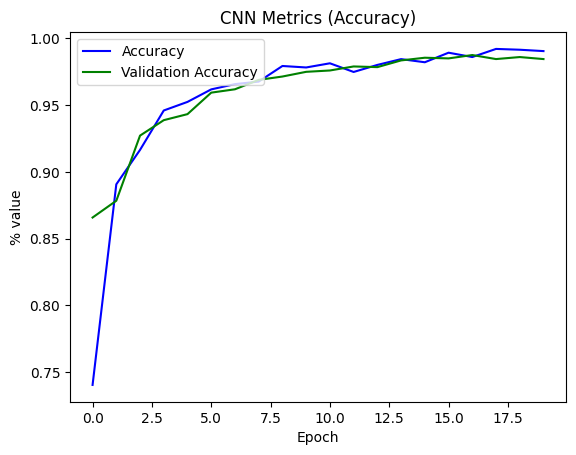

In [13]:
plt.plot(history.history['accuracy'], color='blue', label='Accuracy')
plt.plot(history.history['val_accuracy'], color='green', label='Validation Accuracy')
plt.title('CNN Metrics (Accuracy)')
plt.ylabel('% value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

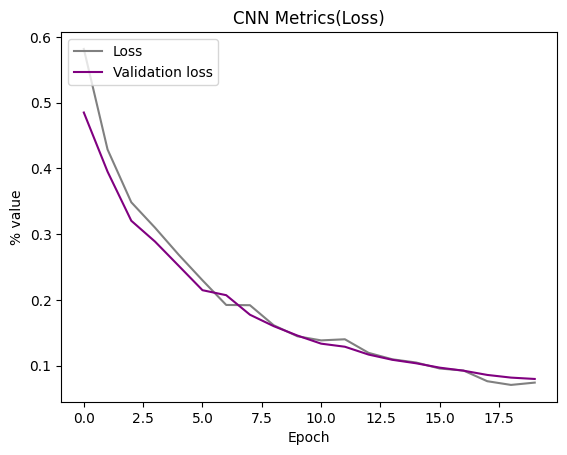

In [14]:
plt.plot(history.history['loss'], color='grey', label='Loss')
plt.plot(history.history['val_loss'], color='purple', label='Validation loss')
plt.title('CNN Metrics(Loss)')
plt.ylabel('% value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step


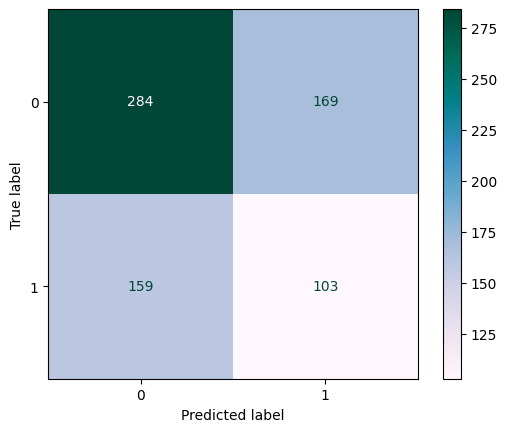

In [24]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

# Generate predictions and convert them to class labels
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)  # Get the class label with the highest probability

# Extract the actual class labels
y_actual = test_generator.classes  # This is already in label form

# Generate the confusion matrix
cm = metrics.confusion_matrix(y_actual, y_pred)

# Display the confusion matrix
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='PuBuGn')
plt.show()


In [25]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_actual, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.6411    0.6269    0.6339       453
           1     0.3787    0.3931    0.3858       262

    accuracy                         0.5413       715
   macro avg     0.5099    0.5100    0.5098       715
weighted avg     0.5449    0.5413    0.5430       715



In [26]:
test_predictions = model.predict(test_generator)
test_pred_classes = np.argmax(test_predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

conf_matrix = confusion_matrix(y_true=true_classes, y_pred=test_pred_classes)
print('Confusion matrix:\n', conf_matrix)

12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step
Confusion matrix:
 [[285 168]
 [158 104]]
